<a href="https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/master/tutorials/W1D3_ModelFitting/W1D3_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Fitting: Linear regression with MSE

**Original content creators**: Pierre-Étienne Fiquet, Anqi Wu, Alex Hyafil with help from Byron Galbraith

**Content modified**: Kai Chen





___
# Tutorial Objectives

We start with simple linear regression, using least squares optimization, and then extend to multiple linear regression (Tutorial 1).
In the bonus tutorials, we will an alternative methods, Maximum Likelihood Estimation, for linear regression problem, and try to compare the difference with previous ones. (Tutorial Bonus 1).
We will use bootstrapping to build confidence intervals around the inferred linear model parameters (Tutorial Bonus 2).
We end by learning how to choose between these various models.
We discuss the bias-variance trade-off (Tutorial Bonus 3) and Cross Validation for model selection (Tutorial Bonus 4).

In this tutorial, we will learn how to fit linear models to data.
- Learn how to calculate the mean-squared error (MSE) 
- Explore how model parameters (slope) influence the MSE
- Learn how to find the optimal model parameter using least-squares optimization
- Learn how to structure inputs for regression using the 'Design Matrix'
- Generalize the MSE for multiple features using the ordinary least squares estimator
- Visualize data and model fit in multiple dimensions

- Fit polynomial regression models of different complexity
- Plot and evaluate the polynomial regression fits

---


---
# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#@title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
# plt.style.use("https://raw.githubusercontent.com/NeoNeuron/professional-workshop-3/master/nma.mplstyle")

In [3]:
#@title Helper functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
      x (ndarray): observed x values
  y (ndarray): observed y values
  y_hat (ndarray): predicted y values

  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {mse(x, y, theta_hat):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

def plot_fitted_polynomials(x, y, theta_hat):
  """ Plot polynomials of different orders

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    theta_hat (dict): polynomial regression weights for different orders
  """

  x_grid = np.linspace(x.min() - .5, x.max() + .5)

  plt.figure()

  for order in range(0, max_order + 1):
    X_design = make_design_matrix(x_grid, order)
    plt.plot(x_grid, X_design @ theta_hat[order]);

  plt.ylabel('y')
  plt.xlabel('x')
  plt.plot(x, y, 'C0.');
  plt.legend([f'order {o}' for o in range(max_order + 1)], loc=1)
  plt.title('polynomial fits')
  plt.show()

---
# Section 1: Mean Squared Error (MSE)

**Linear least squares regression** is an old but gold  optimization procedure that we are going to use for data fitting. Least squares (LS) optimization problems are those in which the objective function is a quadratic function of the
parameter(s) being optimized.

Suppose you have a set of measurements, $y_{n}$ (the "dependent" variable) obtained for different input values, $x_{n}$ (the "independent" or "explanatory" variable). Suppose we believe the measurements are proportional to the input values, but are corrupted by some (random) measurement errors, $\epsilon_{n}$, that is:

$$y_{n}= \theta x_{n}+\epsilon_{n}$$

for some unknown slope parameter $\theta.$ The least squares regression problem uses **mean squared error (MSE)** as its objective function, it aims to find the value of the parameter $\theta$ by minimizing the average of squared errors:

\begin{align}
\min _{\theta} \frac{1}{N}\sum_{n=1}^{N}\left(y_{n}-\theta x_{n}\right)^{2}
\end{align}

We will now explore how MSE is used in fitting a linear regression model to data. For illustrative purposes, we will create a simple synthetic dataset where we know the true underlying model. This will allow us to see how our estimation efforts compare in uncovering the real model (though in practice we rarely have this luxury).

First we will generate some noisy samples $x$ from [0, 10) along the line $y = 1.2x$ as our dataset we wish to fit a model to.

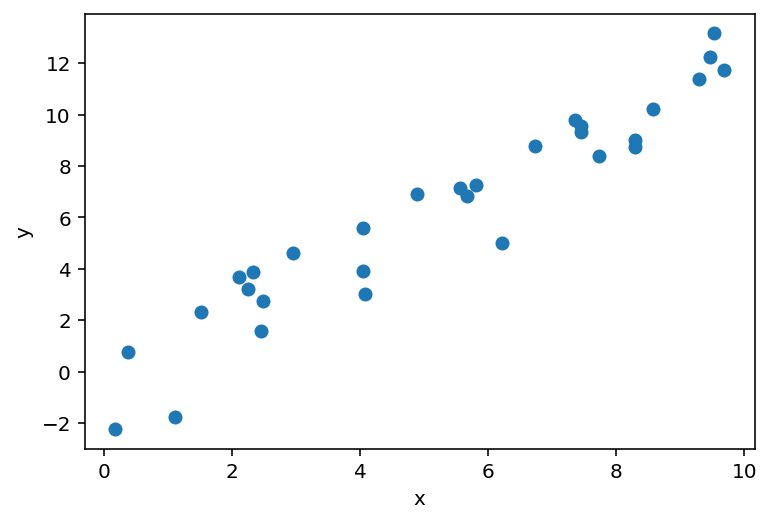

In [4]:
# @title

# @markdown Execute this cell to generate some simulated data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)  # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

# Plot the results
fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

Now that we have our suitably noisy dataset, we can start trying to estimate the underlying model that produced it. We use MSE to evaluate how successful a particular slope estimate $\hat{\theta}$ is for explaining the data, with the closer to 0 the MSE is, the better our estimate fits the data.

## Exercise 1: Compute MSE

In this exercise you will implement a method to compute the mean squared error for a set of inputs $x$, measurements $y$, and slope estimate $\hat{\theta}$. We will then compute and print the mean squared error for 3 different choices of theta

In [5]:
def mse(x, y, theta_hat):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """
  ####################################################
  ## TODO for students: compute the mean squared error
  # Fill out function and remove
  raise NotImplementedError("Student exercise: compute the mean squared error")
  ####################################################

  # Compute the estimated y
  y_hat = ...

  # Compute mean squared error
  mse = ...

  return mse


# Uncomment below to test your function
theta_hats = [0.75, 1.0, 1.5]
# for theta_hat in theta_hats:
#   print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

In [6]:
# to_remove solution
def mse(x, y, theta_hat):
  """Compute the mean squared error

  Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
    theta_hat (float): An estimate of the slope parameter

  Returns:
    float: The mean squared error of the data with the estimated parameter.
  """

  # Compute the estimated y
  y_hat = theta_hat * x

  # Compute mean squared error
  mse = np.mean((y - y_hat)**2)

  return mse


theta_hats = [0.75, 1.0, 1.5]
for theta_hat in theta_hats:
  print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

theta_hat of 0.75 has an MSE of 9.08
theta_hat of 1.0 has an MSE of 3.01
theta_hat of 1.5 has an MSE of 4.52


The result should be:

theta_hat of 0.75 has an MSE of 9.08\
theta_hat of 1.0 has an MSE of 3.0\
theta_hat of 1.5 has an MSE of 4.52





We see that $\hat{\theta} = 1.0$ is our best estimate from the three we tried. Looking just at the raw numbers, however, isn't always satisfying, so let's visualize what our estimated model looks like over the data. 



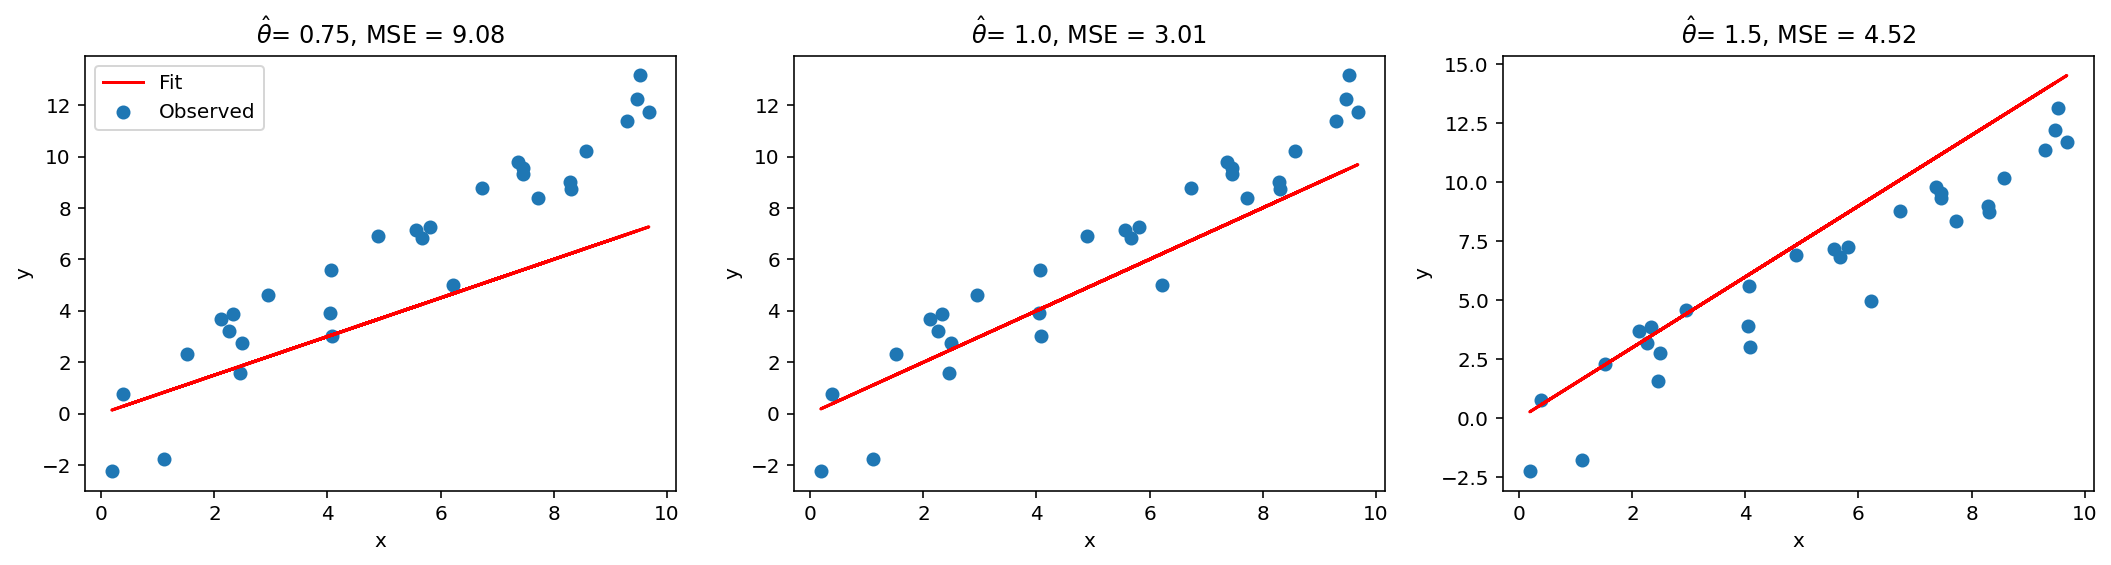

In [7]:
#@title

#@markdown Execute this cell to visualize estimated models

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {mse(x, y, theta_hat):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()

## Interactive Demo: MSE Explorer

Using an interactive widget, we can easily see how changing our slope estimate changes our model fit. We display the **residuals**, the differences between observed and predicted data, as line segments between the data point (observed response) and the corresponding predicted response on the model fit line.

interactive(children=(FloatSlider(value=1.0, description='theta_hat', max=2.0), Output()), _dom_classes=('widg…

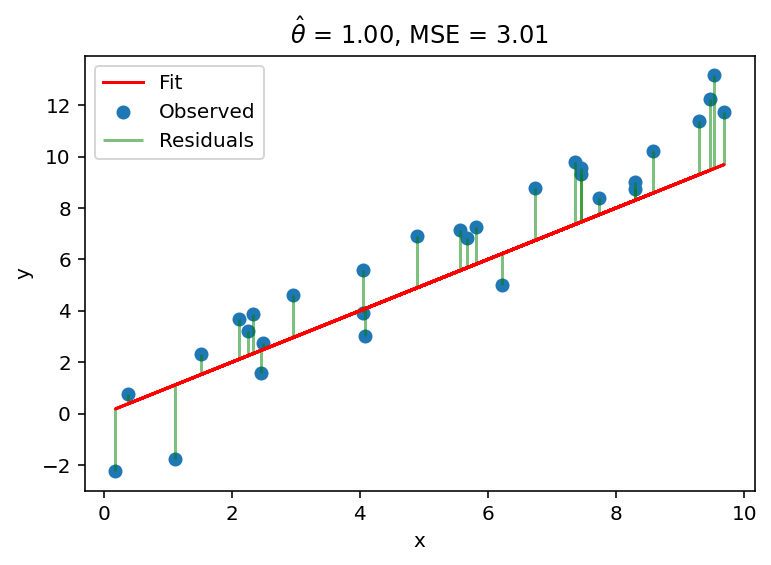

In [8]:
#@title

#@markdown Make sure you execute this cell to enable the widget!

@widgets.interact(theta_hat=widgets.FloatSlider(1.0, min=0.0, max=2.0))
def plot_data_estimate(theta_hat):
  y_hat = theta_hat * x
  plot_observed_vs_predicted(x, y, y_hat, theta_hat)

While visually exploring several estimates can be instructive, it's not the most efficient for finding the best estimate to fit our data. Another technique we can use is choose a reasonable range of parameter values and compute the MSE at several values in that interval. This allows us to plot the error against the parameter value (this is also called an **error landscape**, especially when we deal with more than one parameter). We can select the final $\hat{\theta}$ ($\hat{\theta}_{MSE}$) as the one which results in the lowest error.

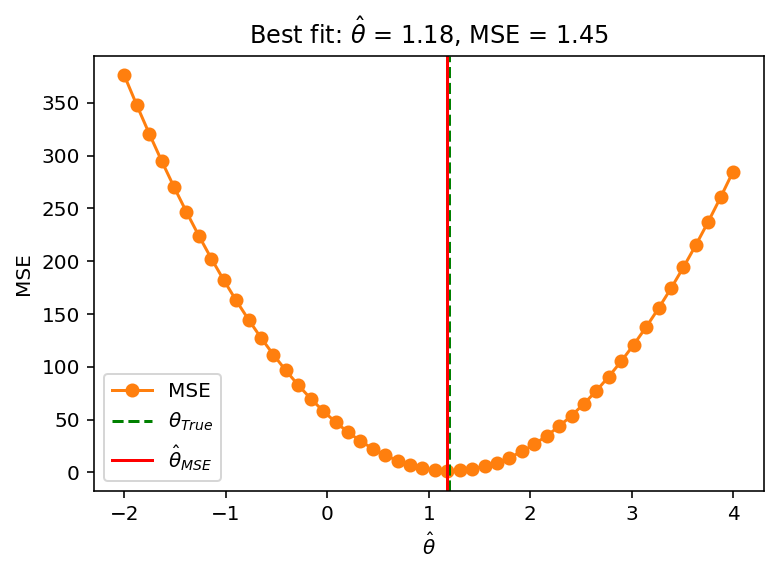

In [9]:
# @title

# @markdown Execute this cell to loop over theta_hats, compute MSE, and plot results

# Loop over different thetas, compute MSE for each
theta_hat_grid = np.linspace(-2.0, 4.0)
errors = np.zeros(len(theta_hat_grid))
for i, theta_hat in enumerate(theta_hat_grid):
  errors[i] = mse(x, y, theta_hat)

# Find theta that results in lowest error
best_error = np.min(errors)
theta_hat = theta_hat_grid[np.argmin(errors)]


# Plot results
fig, ax = plt.subplots()
ax.plot(theta_hat_grid, errors, '-o', label='MSE', c='C1')
ax.axvline(theta, color='g', ls='--', label=r"$\theta_{True}$")
ax.axvline(theta_hat, color='r', ls='-', label=r"$\hat{{\theta}}_{MSE}$")
ax.set(
  title=fr"Best fit: $\hat{{\theta}}$ = {theta_hat:.2f}, MSE = {best_error:.2f}",
  xlabel=r"$\hat{{\theta}}$",
  ylabel='MSE')
ax.legend();

We can see that our best fit is $\hat{\theta}=1.18$ with an MSE of 1.45. This is quite close to the original true value $\theta=1.2$!


---
# Section 2: Least-squares optimization


While the approach detailed above (computing MSE at various values of $\hat\theta$) quickly got us to a good estimate, it still relied on evaluating the MSE value across a grid of hand-specified values. If we didn't pick a good range to begin with, or with enough granularity, we might miss the best possible estimator. Let's go one step further, and instead of finding the minimum MSE from a set of candidate estimates, let's solve for it analytically.

We can do this by minimizing the cost function. Mean squared error is a convex objective function, therefore we can compute its minimum using calculus. Please see video or appendix for this derivation! After computing the minimum, we find that:

\begin{align}
\hat\theta = \frac{\vec{x}^\top \vec{y}}{\vec{x}^\top \vec{x}}
\end{align}

This is known as solving the normal equations. For different ways of obtaining the solution, see the notes on [Least Squares Optimization](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) by Eero Simoncelli.

### Exercise 2: Solve for the Optimal Estimator

In this exercise, you will write a function that finds the optimal $\hat{\theta}$ value using the least squares optimization approach (the equation above) to solve MSE minimization. It shoud take arguments $x$ and $y$ and return the solution $\hat{\theta}$.

We will then use your function to compute $\hat{\theta}$ and plot the resulting prediction on top of the data. 

In [10]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  ################################################################################
  ## TODO for students: solve for the best parameter using least squares
  # Fill out function and remove
  raise NotImplementedError("Student exercise: solve for theta_hat using least squares")
  ################################################################################

  # Compute theta_hat analytically
  theta_hat = ...

  return theta_hat


# Uncomment below to test your function
# theta_hat = solve_normal_eqn(x, y)
# y_hat = theta_hat * x
# plot_observed_vs_predicted(x, y, y_hat, theta_hat)

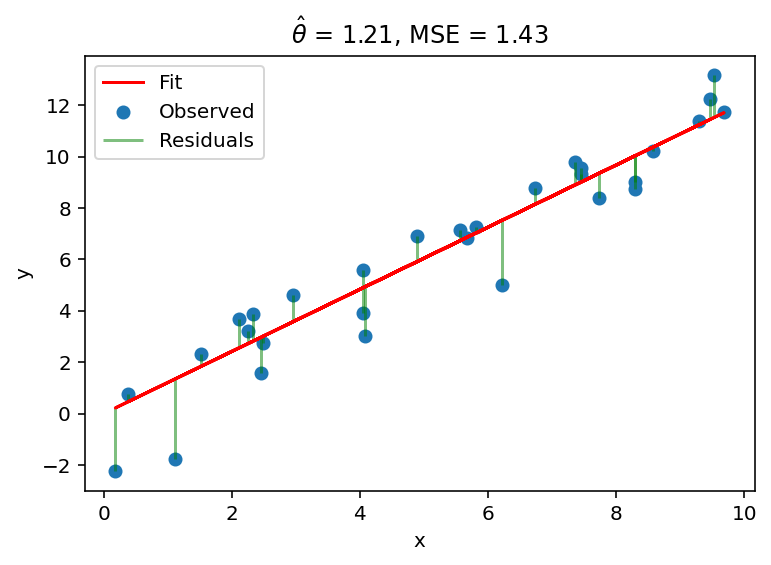

In [11]:
# to_remove solution
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.

    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.

  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  # Compute theta_hat analytically
  theta_hat = (x.T @ y) / (x.T @ x)

  return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x

plot_observed_vs_predicted(x, y, y_hat, theta_hat)

We see that the analytic solution produces an even better result than our grid search from before, producing $\hat{\theta} = 1.21$ with MSE = 1.43!

---
# Section 3: Multiple Linear Regression



Now that we have considered the univariate case and how to produce confidence intervals for our estimator, we turn to the general linear regression case, where we can have more than one regressor, or feature, in our input.

Recall that our original univariate linear model was given as

\begin{align}
y = \theta x + \epsilon
\end{align}

where $\theta$ is the slope and $\epsilon$ some noise. We can easily extend this to the multivariate scenario by adding another parameter for each additional feature

\begin{align}
y = \theta_0 + \theta_1 x_1 + \theta_1 x_2 + ... +\theta_d x_d + \epsilon
\end{align}

where $\theta_0$ is the intercept and $d$ is the number of features (it is also the dimensionality of our input).

We can condense this succinctly using vector notation for a single data point

\begin{align}
y_i = \boldsymbol{\theta}^{\top}\mathbf{x}_i + \epsilon
\end{align}

and fully in matrix form

\begin{align}
\mathbf{y} = \mathbf{X}\boldsymbol{\theta} + \mathbf{\epsilon}
\end{align}

where $\mathbf{y}$ is a vector of measurements, $\mathbf{X}$ is a matrix containing the feature values (columns) for each input sample (rows), and $\boldsymbol{\theta}$ is our parameter vector.

This matrix $\mathbf{X}$ is often referred to as the "[design matrix](https://en.wikipedia.org/wiki/Design_matrix)".


Here we will focus on the two-dimensional case ($d=2$), which allows us to easily visualize our results. As an example, think of a situation where a scientist records the spiking response of a retinal ganglion cell to patterns of light signals that vary in contrast and in orientation. Then contrast and orientation values can be used as features / regressors to predict the cells response.

In this case our model can be writen as:

\begin{align}
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \epsilon
\end{align}

or in matrix form where

\begin{align}
\mathbf{X} = 
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} \\
1 & x_{2,1} & x_{2,2} \\
\vdots & \vdots & \vdots \\
1 & x_{n,1} & x_{n,2}
\end{bmatrix}, 
\boldsymbol{\theta} =
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\end{bmatrix}
\end{align}

For our actual exploration dataset we shall set $\boldsymbol{\theta}=[0, -2, -3]$ and draw $N=40$ noisy samples from $x \in [-2,2)$. Note that setting the value of $\theta_0 = 0$ effectively ignores the offset term.

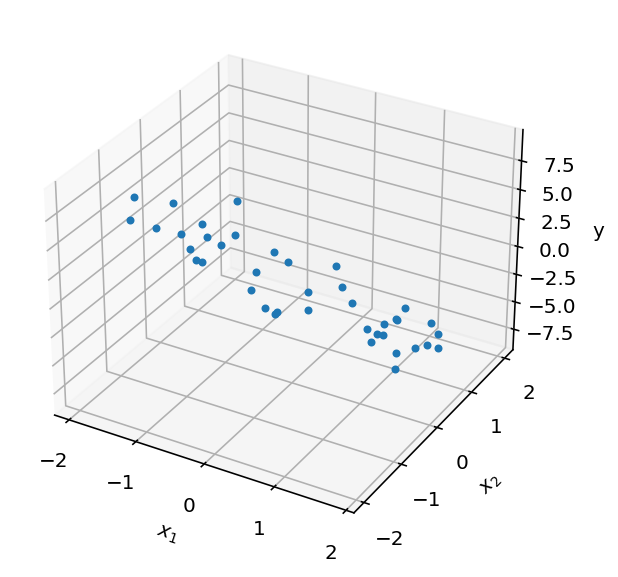

In [12]:
#@title
#@markdown Execute this cell to simulate some data

# Set random seed for reproducibility
np.random.seed(1234)

# Set parameters
theta = [0, -2, -3]
n_samples = 40

# Draw x and calculate y
n_regressors = len(theta)
x0 = np.ones((n_samples, 1))
x1 = np.random.uniform(-2, 2, (n_samples, 1))
x2 = np.random.uniform(-2, 2, (n_samples, 1))
X = np.hstack((x0, x1, x2))
noise = np.random.randn(n_samples)
y = X @ theta + noise


ax = plt.subplot(projection='3d')
ax.plot(X[:,1], X[:,2], y, '.')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

Now that we have our dataset, we want to find an optimal vector of paramters $\boldsymbol{\hat\theta}$. Recall our analytic solution to minimizing MSE for a single regressor:

\begin{align}
\hat\theta = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}.
\end{align}

The same holds true for the multiple regressor case, only now expressed in matrix form

\begin{align}
\boldsymbol{\hat\theta} = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top\mathbf{y}.
\end{align}

This is called the [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) estimator.

### Exercise 3: Ordinary Least Squares Estimator

In this exercise you will implement the OLS approach to estimating $\boldsymbol{\hat\theta}$ from the design matrix $\mathbf{X}$ and measurement vector $\mathbf{y}$. You can use the `@` symbol for matrix multiplication, `.T` for transpose, and `np.linalg.inv` for matrix inversion.


In [13]:
def ordinary_least_squares(X, y):
  """Ordinary least squares estimator for linear regression.

  Args:
    x (ndarray): design matrix of shape (n_samples, n_regressors)
    y (ndarray): vector of measurements of shape (n_samples)

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """
  ######################################################################
  ## TODO for students: solve for the optimal parameter vector using OLS
  # Fill out function and remove
  raise NotImplementedError("Student exercise: solve for theta_hat vector using OLS")
  ######################################################################

  # Compute theta_hat using OLS
  theta_hat = ...

  return theta_hat


# Uncomment below to test your function
# theta_hat = ordinary_least_squares(X, y)
# print(theta_hat)

In [14]:
# to_remove solution
def ordinary_least_squares(X, y):
  """Ordinary least squares estimator for linear regression.

  Args:
    X (ndarray): design matrix of shape (n_samples, n_regressors)
    y (ndarray): vector of measurements of shape (n_samples)

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """

  # Compute theta_hat using OLS
  theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

  return theta_hat


theta_hat = ordinary_least_squares(X, y)
print(theta_hat)

[ 0.13861386 -2.09395731 -3.16370742]


After filling in this function, you should see that $\hat{\theta}$ = [ 0.13861386, -2.09395731, -3.16370742]

Now that we have our $\mathbf{\hat\theta}$, we can obtain $\mathbf{\hat y}$ and thus our mean squared error.

In [15]:
# Compute predicted data
theta_hat = ordinary_least_squares(X, y)
y_hat = X @ theta_hat

# Compute MSE
print(f"MSE = {np.mean((y - y_hat)**2):.2f}")

MSE = 0.91


Finally, the following code will plot a geometric visualization of the data points (blue) and fitted plane. You can see that the residuals (green bars) are orthogonal to the plane.

Extra: how would you check that the residuals are orthogonal to the fitted plane? (this is sometimes called the orthogonality principle, see [least squares notes](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf))

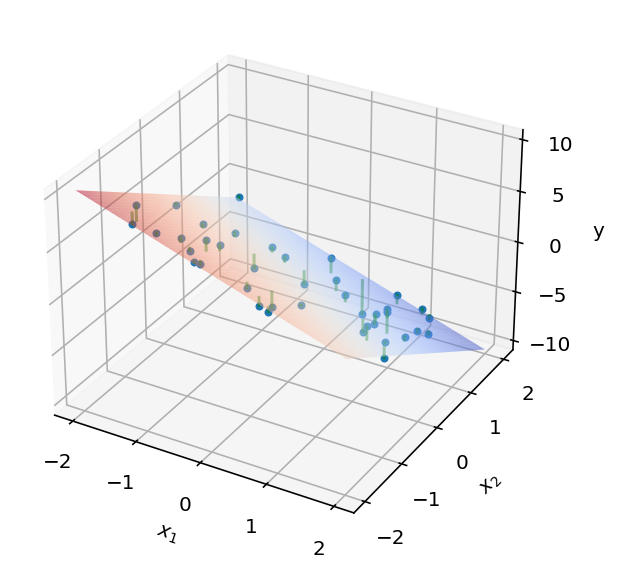

In [16]:
#@title
#@markdown Execute this cell to visualize data and predicted plane

theta_hat = ordinary_least_squares(X, y)
xx, yy = np.mgrid[-2:2:50j, -2:2:50j]
y_hat_grid = np.array([xx.flatten(), yy.flatten()]).T @ theta_hat[1:]
y_hat_grid = y_hat_grid.reshape((50, 50))

ax = plt.subplot(projection='3d')
ax.plot(X[:, 1], X[:, 2], y, '.')
ax.plot_surface(xx, yy, y_hat_grid, linewidth=0, alpha=0.5, color='C1',
                cmap=plt.get_cmap('coolwarm'))

for i in range(len(X)):
  ax.plot((X[i, 1], X[i, 1]),
          (X[i, 2], X[i, 2]),
          (y[i], y_hat[i]),
          'g-', alpha=.5)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

---
# Summary

- Linear least squares regression is an optimization procedure that can be used for data fitting:
    - Task: predict a value for $y$ given $x$
    - Performance measure: $\textrm{MSE}$
    - Procedure: minimize $\textrm{MSE}$ by solving the normal equations
- Linear regression generalizes naturally to multiple dimensions
- Linear algebra affords us the mathematical tools to reason and solve such problems beyond the two dimensional case
- **Key point**: We fit the model by defining an *objective function* and minimizing it. 
- **Note**: 
    - In this case, there is an *analytical* solution to the minimization problem and in practice, this solution can be computed using *linear algebra*. This is *extremely* powerful and forms the basis for much of numerical computation throughout the sciences.
    - In practice, multidimensional least squares problems can be solved very efficiently (thanks to numerical routines such as LAPACK).

---
# Bonus:  Polynomial Regression

So far today, you learned how to predict outputs from inputs by fitting a linear regression model. We can now model all sort of relationships, including in neuroscience!  

One potential problem with this approach is the simplicity of the model. Linear regression, as the name implies, can only capture a linear relationship between the inputs and outputs. Put another way, the predicted outputs are only a weighted sum of the inputs. What if there are more complicated computations happening? Luckily, many more complex models exist (and you will encounter many more over the next 3 weeks). One model that is still very simple to fit and understand, but captures more complex relationships, is **polynomial regression**, an extension of linear regression.

Since polynomial regression is an extension of linear regression, everything you learned so far will come in handy now! The goal is the same: we want to predict the dependent variable $y_{n}$ given the input values $x_{n}$. The key change is the type of relationship between inputs and outputs that the model can capture. 

Linear regression models predict the outputs as a weighted sum of the inputs:

$$y_{n}= \theta_0 + \theta x_{n} + \epsilon_{n}$$

With polynomial regression, we model the outputs as a polynomial equation based on the inputs. For example, we can model the outputs as:

$$y_{n}= \theta_0 + \theta_1 x_{n} + \theta_2 x_{n}^2 + \theta_3 x_{n}^3 + \epsilon_{n}$$

We can change how complex a polynomial is fit by changing the order of the polynomial. The order of a polynomial refers to the highest power in the polynomial. The equation above is a third order polynomial because the highest value x is raised to is 3. We could add another term ($+ \theta_4 x_{n}^4$) to model an order 4 polynomial and so on.



First, we will simulate some data to practice fitting polynomial regression models. We will generate random inputs $x$ and then compute y according to $y = x^2 - x - 2 $, with some extra noise both in the input and the output to make the model fitting exercise closer to a real life situation.

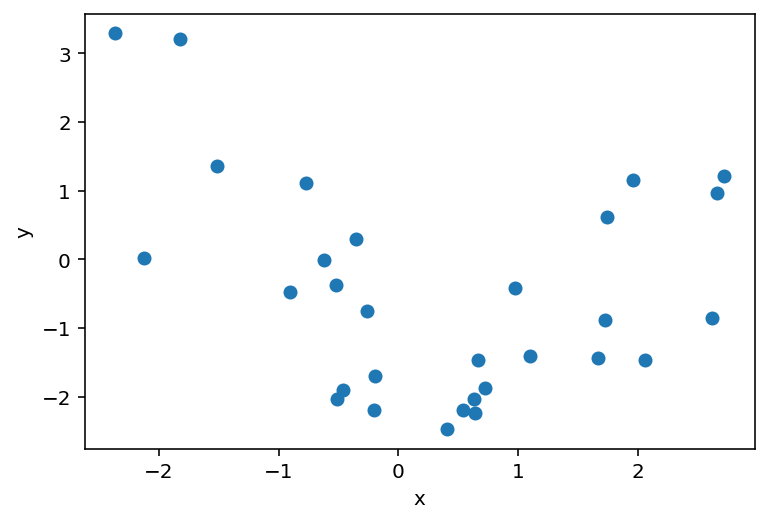

In [17]:
#@title
#@markdown Execute this cell to simulate some data

# setting a fixed seed to our random number generator ensures we will always
# get the same psuedorandom number sequence
np.random.seed(121)
n_samples = 30
x = np.random.uniform(-2, 2.5, n_samples)  # inputs uniformly sampled from [-2, 2.5)
y =  x**2 - x - 2   # computing the outputs

output_noise = 1/8 * np.random.randn(n_samples)
y += output_noise  # adding some output noise

input_noise = 1/2 * np.random.randn(n_samples)
x += input_noise  # adding some input noise

fig, ax = plt.subplots()
ax.scatter(x, y)  # produces a scatter plot
ax.set(xlabel='x', ylabel='y');

## Design matrix for polynomial regression

Now we have the basic idea of polynomial regression and some noisy data, let's begin! The key difference between fitting a linear regression model and a polynomial regression model lies in how we structure the input variables.  

For linear regression, we used $X = x$ as the input data. To add a constant bias (a y-intercept in a 2-D plot), we use $X = \big[ \boldsymbol 1, x \big]$, where $\boldsymbol 1$ is a column of ones.  When fitting, we learn a weight for each column of this matrix. So we learn a weight that multiples with column 1 - in this case that column is all ones so we gain the bias parameter ($+ \theta_0$). We also learn a weight for every column, or every feature of x, as we learned in Section 1.

This matrix $X$ that we use for our inputs is known as a **design matrix**. We want to create our design matrix so we learn weights for $x^2, x^3,$ etc. Thus, we want to build our design matrix $X$ for polynomial regression of order $k$ as:

$$X = \big[ \boldsymbol 1 , x^1, x^2 , \ldots , x^k \big],$$

where $\boldsymbol{1}$ is the vector the same length as $x$ consisting of of all ones, and $x^p$ is the vector or matrix $x$ with all elements raised to the power $p$. Note that $\boldsymbol{1} = x^0$ and $x^1 = x$ 

### Exercise : Structure design matrix

Create a function (`make_design_matrix`) that structures the design matrix given the input data and the order of the polynomial you wish to fit. We will print part of this design matrix for our data and order 5.

In [18]:
def make_design_matrix(x, order):
  """Create the design matrix of inputs for use in polynomial regression

  Args:
    x (ndarray): input vector of shape (n_samples)
    order (scalar): polynomial regression order

  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order+1)
  """
  ########################################################################
  ## TODO for students: create the design matrix ##
  # Fill out function and remove
  raise NotImplementedError("Student exercise: create the design matrix")
  ########################################################################

  # Broadcast to shape (n x 1) so dimensions work
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through rest of degrees and stack columns (hint: np.hstack)
  for degree in range(1, order + 1):
      design_matrix = ...

  return design_matrix


# Uncomment to test your function
order = 5
# X_design = make_design_matrix(x, order)
# print(X_design[0:2, 0:2])

In [19]:
# to_remove solution
def make_design_matrix(x, order):
  """Create the design matrix of inputs for use in polynomial regression

  Args:
    x (ndarray): input vector of shape (samples,)
    order (scalar): polynomial regression order

  Returns:
    ndarray: design matrix for polynomial regression of shape (samples, order+1)
  """

  # Broadcast to shape (n x 1) so dimensions work
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature, we don't want multiple columns of ones so we assign
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop through rest of degrees and stack columns (hint: np.hstack)
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix


order = 5
X_design = make_design_matrix(x, order)
print(X_design[0:2, 0:2])

[[ 1.         -1.51194917]
 [ 1.         -0.35259945]]


You should see that the printed section of this design matrix is `[[ 1.         -1.51194917]
 [ 1.         -0.35259945]]`

## Fitting polynomial regression models

Now that we have the inputs structured correctly in our design matrix, fitting a polynomial regression is the same as fitting a linear regression model! All of the polynomial structure we need to learn is contained in how the inputs are structured in the design matrix. We can use the same least squares solution we computed in previous exercises. 

### Exercise : Fitting polynomial regression models with different orders 

Here, we will fit polynomial regression models to find the regression coefficients ($\theta_0, \theta_1, \theta_2,$ ...) by solving the least squares problem. Create a function `solve_poly_reg` that loops over different order polynomials (up to `max_order`), fits that model, and saves out the weights for each. You may invoke the `ordinary_least_squares` function. 

We will then qualitatively inspect the quality of our fits for each order by plotting the fitted polynomials on top of the data. In order to see smooth curves, we evaluate the fitted polynomials on a grid of $x$ values (ranging between the largest and smallest of the inputs present in the dataset).

In [20]:
def solve_poly_reg(x, y, max_order):
  """Fit a polynomial regression model for each order 0 through max_order.

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    max_order (scalar): max order for polynomial fits

  Returns:
    dict: fitted weights for each polynomial model (dict key is order)
  """

  # Create a dictionary with polynomial order as keys,
  # and np array of theta_hat (weights) as the values
  theta_hats = {}

  # Loop over polynomial orders from 0 through max_order
  for order in range(max_order + 1):

    ##################################################################################
    ## TODO for students: Create design matrix and fit polynomial model for this order
    # Fill out function and remove
    raise NotImplementedError("Student exercise: fit a polynomial model")
    ##################################################################################

    # Create design matrix
    X_design = ...

    # Fit polynomial model
    this_theta = ...

    theta_hats[order] = this_theta

  return theta_hats


# Uncomment to test your function
max_order = 5
# theta_hats = solve_poly_reg(x, y, max_order)
# plot_fitted_polynomials(x, y, theta_hats)

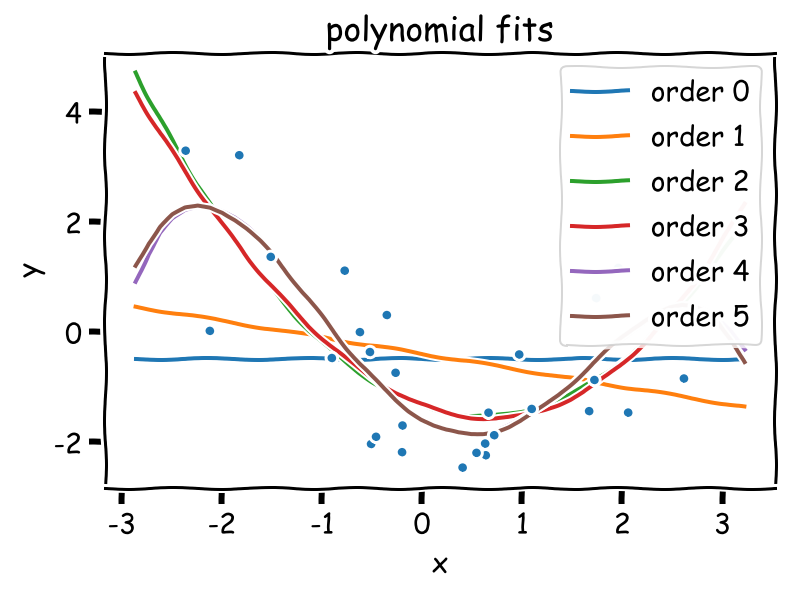

In [21]:
# to_remove solution

def solve_poly_reg(x, y, max_order):
  """Fit a polynomial regression model for each order 0 through max_order.

  Args:
    x (ndarray): input vector of shape (n_samples)
    y (ndarray): vector of measurements of shape (n_samples)
    max_order (scalar): max order for polynomial fits

  Returns:
    dict: fitted weights for each polynomial model (dict key is order)
  """

  # Create a dictionary with polynomial order as keys,
  # and np array of theta_hat (weights) as the values
  theta_hats = {}

  # Loop over polynomial orders from 0 through max_order
  for order in range(max_order + 1):

    # Create design matrix
    X_design = make_design_matrix(x, order)

    # Fit polynomial model
    this_theta = ordinary_least_squares(X_design, y)

    theta_hats[order] = this_theta

  return theta_hats


max_order = 5
theta_hats = solve_poly_reg(x, y, max_order)
with plt.xkcd():
  plot_fitted_polynomials(x, y, theta_hats)

## Evaluating fit quality

As with linear regression, we can compute mean squared error (MSE) to get a sense of how well the model fits the data. 

We compute MSE as:

$$ MSE = \frac 1 N ||y - \hat y||^2 = \sum_{i=1}^N (y_i - \hat y_i)^2 $$

where the predicted values for each model are given by $ \hat y = X \hat \theta$. 

*Which model (i.e. which polynomial order) do you think will have the best MSE?*

### Exercise : Compute MSE and compare models


We will compare the MSE for different polynomial orders with a bar plot.

[Text(0.5, 1.0, 'Comparing Polynomial Fits'),
 Text(0.5, 0, 'Polynomial order'),
 Text(0, 0.5, 'MSE')]

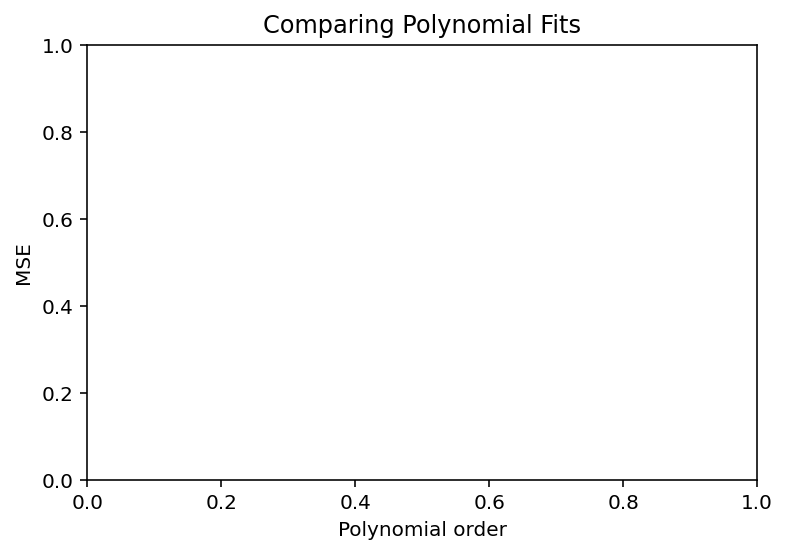

In [22]:
mse_list = []
order_list = list(range(max_order + 1))

for order in order_list:

  X_design = make_design_matrix(x, order)

  ############################################################################
  # TODO for students: Compute MSE (fill in ... sections)
  #############################################################################

  # Get prediction for the polynomial regression model of this order
  y_hat = ...

  # Compute the residuals
  residuals = ...

  # Compute the MSE
  mse = ...

  mse_list.append(mse)

fig, ax = plt.subplots()

# Uncomment once above exercise is complete
# ax.bar(order_list, mse_list)

ax.set(title='Comparing Polynomial Fits', xlabel='Polynomial order', ylabel='MSE')

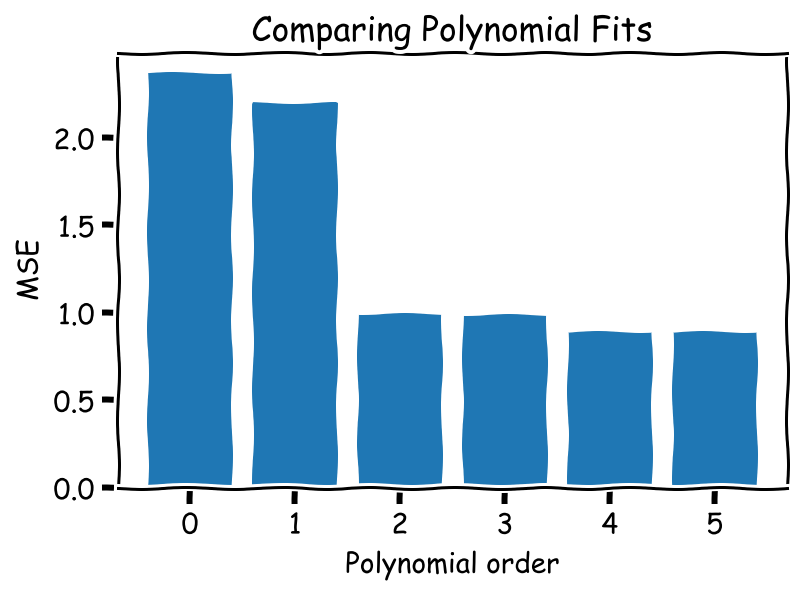

In [23]:
# to_remove solution
mse_list = []
order_list = list(range(max_order + 1))

for order in order_list:

  X_design = make_design_matrix(x, order)

  # Get prediction for the polynomial regression model of this order
  y_hat = X_design @ theta_hats[order]

  # Compute the residuals
  residuals = y - y_hat

  # Compute the MSE
  mse = np.mean(residuals ** 2)

  mse_list.append(mse)

with plt.xkcd():
  fig, ax = plt.subplots()
  ax.bar(order_list, mse_list)
  ax.set(title='Comparing Polynomial Fits', xlabel='Polynomial order', ylabel='MSE')


* To change from a linear regression model to a polynomial regression model, we only have to change how the input data is structured

* We can choose the complexity of the model by changing the order of the polynomial model fit

* Higher order polynomial models tend to have lower MSE on the data they're fit with

---


# Notation
\begin{align}
x_{i} &\quad \text{input, independent variable}\\
y_{i} &\quad \text{measurement, dependent variable}\\
\mathbf{x} &\quad \text{vector of input values}\\
\mathbf{y} &\quad \text{vector of measurements}\\
\hat{y}_{i} &\quad \text{estimate of dependent variable}\\
\epsilon_{i} &\quad \text{measurement error}\\
\theta &\quad \text{slope parameter}\\
\hat{\theta} &\quad \text{estimated slope parameter}\\
\hat{\theta}_\text{MSE} &\quad \text{slope parameter estimated via the mean squared error}\\
\textrm{MSE} &\quad \text{mean squared error}\\
\end{align}

---
# Appendix

## Least Squares Optimization Derivation

We will outline here the derivation of the least squares solution.

We first set the derivative of the error expression with respect to $\theta$ equal to zero, 

\begin{align}
\frac{d}{d\theta}\frac{1}{N}\sum_{i=1}^N(y_i - \theta x_i)^2 = 0 \\
\frac{1}{N}\sum_{i=1}^N-2x_i(y_i - \theta x_i) = 0
\end{align}

where we used the chain rule. Now solving for $\theta$, we obtain an optimal value of:

\begin{align}
\hat\theta = \frac{\sum_{i=1}^N x_i y_i}{\sum_{i=1}^N x_i^2}
\end{align}

Which we can write in vector notation as:

\begin{align}
\hat\theta = \frac{\vec{x}^\top \vec{y}}{\vec{x}^\top \vec{x}}
\end{align}


This is known as solving the *normal equations*. For different ways of obtaining the solution, see the notes on [Least Squares Optimization](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) by Eero Simoncelli.